In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sh=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\SpecificHumidity\SpecificHumidity.csv")

In [3]:
sh

,Year,Month,SH_past,SH_pasttopast,SpecificHumidity
0,2002,1,0.006637,0.005236,0.006597
1,2002,2,0.004363,0.007144,0.006809
2,2002,3,0.007248,0.005216,0.006440
3,2002,4,0.009702,0.008812,0.008083
4,2002,5,0.012276,0.013369,0.013759
...,...,...,...,...,...
211,2019,8,0.016013,0.016198,0.016198
212,2019,9,0.015080,0.017074,0.017074
213,2019,10,0.012049,0.015034,0.015034
214,2019,11,0.009470,0.010980,0.010980


In [4]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              216 non-null    int64  
 1   Month             216 non-null    int64  
 2   SH_past           216 non-null    float64
 3   SH_pasttopast     216 non-null    float64
 4   SpecificHumidity  216 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [5]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=sh.corr()
corr_matrix

,Year,Month,SH_past,SH_pasttopast,SpecificHumidity
Year,1.000000e+00,4.861859e-15,0.006269,0.033992,-0.001130
Month,4.861859e-15,1.000000e+00,0.460887,0.456328,0.466303
SH_past,6.269314e-03,4.608871e-01,1.000000,0.954866,0.955812
SH_pasttopast,3.399211e-02,4.563280e-01,0.954866,1.000000,0.959956
SpecificHumidity,-1.130009e-03,4.663034e-01,0.955812,0.959956,1.000000


In [12]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

In [13]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [14]:
#mintemp=mintemp.drop(['Month'],axis=1)

In [15]:
sh.shape

(216, 5)

In [16]:
sh=sh.iloc[:,:].values

In [17]:
sh

array([[2.0020e+03, 1.0000e+00, 6.6370e-03, 5.2360e-03, 6.5970e-03],
       [2.0020e+03, 2.0000e+00, 4.3630e-03, 7.1440e-03, 6.8090e-03],
       [2.0020e+03, 3.0000e+00, 7.2480e-03, 5.2160e-03, 6.4400e-03],
       ...,
       [2.0190e+03, 1.0000e+01, 1.2049e-02, 1.5034e-02, 1.5034e-02],
       [2.0190e+03, 1.1000e+01, 9.4700e-03, 1.0980e-02, 1.0980e-02],
       [2.0190e+03, 1.2000e+01, 7.0770e-03, 9.1190e-03, 9.1190e-03]])

In [18]:
X=sh[:,:-1]
y=sh[:,-1]

In [19]:
X

array([[2.0020e+03, 1.0000e+00, 6.6370e-03, 5.2360e-03],
       [2.0020e+03, 2.0000e+00, 4.3630e-03, 7.1440e-03],
       [2.0020e+03, 3.0000e+00, 7.2480e-03, 5.2160e-03],
       [2.0020e+03, 4.0000e+00, 9.7020e-03, 8.8120e-03],
       [2.0020e+03, 5.0000e+00, 1.2276e-02, 1.3369e-02],
       [2.0020e+03, 6.0000e+00, 1.5596e-02, 1.6509e-02],
       [2.0020e+03, 7.0000e+00, 1.5694e-02, 1.5837e-02],
       [2.0020e+03, 8.0000e+00, 1.5980e-02, 1.6022e-02],
       [2.0020e+03, 9.0000e+00, 1.5823e-02, 1.5814e-02],
       [2.0020e+03, 1.0000e+01, 1.4502e-02, 1.3405e-02],
       [2.0020e+03, 1.1000e+01, 1.0931e-02, 9.4610e-03],
       [2.0020e+03, 1.2000e+01, 7.4650e-03, 4.4470e-03],
       [2.0030e+03, 1.0000e+00, 6.5970e-03, 6.6370e-03],
       [2.0030e+03, 2.0000e+00, 6.8090e-03, 4.3630e-03],
       [2.0030e+03, 3.0000e+00, 6.4400e-03, 7.2480e-03],
       [2.0030e+03, 4.0000e+00, 8.0830e-03, 9.7020e-03],
       [2.0030e+03, 5.0000e+00, 1.3759e-02, 1.2276e-02],
       [2.0030e+03, 6.0000e+00,

In [20]:
y

array([0.006597, 0.006809, 0.00644 , 0.008083, 0.013759, 0.016382,
       0.015961, 0.015909, 0.01523 , 0.013   , 0.008541, 0.006089,
       0.006845, 0.006682, 0.006596, 0.009156, 0.010603, 0.015343,
       0.01669 , 0.016167, 0.015614, 0.013515, 0.009321, 0.006508,
       0.006655, 0.005512, 0.005611, 0.008834, 0.014483, 0.016543,
       0.016345, 0.016171, 0.016268, 0.013558, 0.010776, 0.006494,
       0.006352, 0.00626 , 0.006702, 0.009877, 0.011831, 0.016309,
       0.017228, 0.016848, 0.017044, 0.014427, 0.009849, 0.008365,
       0.006647, 0.005051, 0.007764, 0.008554, 0.012215, 0.01668 ,
       0.016562, 0.01637 , 0.016953, 0.014839, 0.012842, 0.00905 ,
       0.00724 , 0.00716 , 0.006512, 0.008494, 0.012188, 0.016639,
       0.017127, 0.016703, 0.016824, 0.012927, 0.01034 , 0.008826,
       0.005612, 0.00601 , 0.008495, 0.00883 , 0.011822, 0.016113,
       0.015981, 0.016401, 0.016183, 0.013522, 0.011427, 0.009077,
       0.006897, 0.005467, 0.00653 , 0.007956, 0.01176 , 0.015

In [21]:
X.shape

(216, 4)

In [22]:
y.shape

(216,)

In [23]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [24]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [25]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

# Linear Regressor

In [26]:
li=LinearRegression()

In [27]:
li.fit(X_train,y_train)

LinearRegression()

In [28]:
Lir_ypred= li.predict(X_test)
Lir_ypred

array([0.00817018, 0.01684916, 0.01461692, 0.00613761, 0.00642815,
       0.01327775, 0.00726914, 0.01644325, 0.01616795, 0.01560022,
       0.01442566, 0.01605248, 0.01369929, 0.00731376, 0.01576443,
       0.00607309, 0.00707916, 0.01154714, 0.01648976, 0.01198022,
       0.01016682, 0.0163579 ])

In [29]:
Linear=pd.DataFrame({'Actual':y_test,'Predicted':Lir_ypred})
Linear

,Actual,Predicted
0,0.008500,0.008170
1,0.017127,0.016849
2,0.014916,0.014617
3,0.008913,0.006138
4,0.006919,0.006428
5,0.014081,0.013278
6,0.008495,0.007269
7,0.016370,0.016443
8,0.016610,0.016168
9,0.017074,0.015600


In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 1.3779690044807177e-06
Root Mean Squared Error: 0.0011738692450527519
R2_Score: 0.9167805854974805


In [32]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.9167805854974805

# Lasso Regressor

In [33]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [34]:
Lass_ypred= lass.predict(X_test)

In [35]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 1.3245576398874468e-05
Root Mean Squared Error: 0.0036394472655713076
R2_Score: 0.20006247667514365


In [36]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.20006247667514365

In [37]:
#Ridge Regressor

In [38]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [39]:
rid_ypred= rid.predict(X_test)

In [40]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 1.3888592821272723e-06
Root Mean Squared Error: 0.0011784987408254928
R2_Score: 0.9161228910743338


In [41]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.9161228910743338

# Decision Tree Regressor

In [42]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
dt_ypred= dt.predict(X_test)

In [45]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 2.818298772727274e-06
Root Mean Squared Error: 0.0016787789529081171
R2_Score: 0.8297950294985645


In [46]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.8297950294985645

# KNN Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=2)
kn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [48]:
kn1_pred=kn.predict(X_test)

In [49]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 7.687869886363638e-07
Root Mean Squared Error: 0.000876804988943587
R2_Score: 0.9535707966845138


In [50]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.9535707966845138

# SVR rbf

In [51]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

In [52]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 1.905394550000001e-05
Root Mean Squared Error: 0.004365082530720354
R2_Score: -0.15072123053338582


In [53]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

-0.15072123053338582

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [56]:
rf_pred=rf.predict(X_test)

In [57]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 1.2396471759480646e-06
Root Mean Squared Error: 0.0011133944386191555
R2_Score: 0.9251342288276099


In [58]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.9251342288276099

# Bayes Regressor

In [59]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)
y_pred=br.predict(X_test)

In [60]:
bay=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
bay

,Actual,Predicted
0,0.008500,0.008181
1,0.017127,0.016839
2,0.014916,0.014619
3,0.008913,0.006146
4,0.006919,0.006440
5,0.014081,0.013280
6,0.008495,0.007269
7,0.016370,0.016438
8,0.016610,0.016164
9,0.017074,0.015597


In [61]:
print('Mean squared Error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score:',r2_score(y_test,y_pred))

Mean squared Error: 1.3780632656072494e-06
Root Mean Squared Error: 0.001173909394121731
R2_Score: 0.9167748928035703


In [62]:
bayes_r2_score=r2_score(y_test,y_pred)
bayes_r2_score

0.9167748928035703

In [63]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

C:\Users\HP\AppData\Local\Temp\ipykernel_25520\2049796945.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


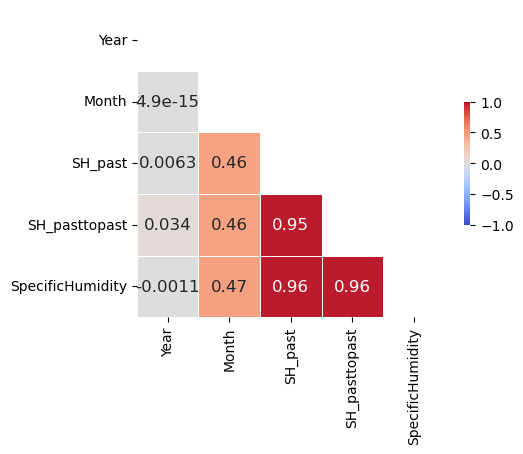

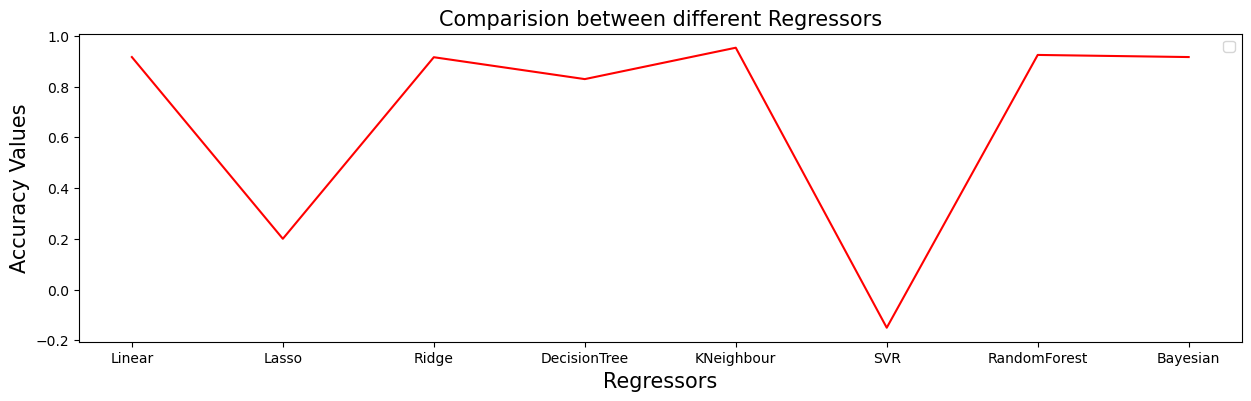

In [64]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


# KNN with neighbour=2 is best for mintemperature prediction with accuracy of 95% followed by random forest with 92.38% 

In [68]:
sh2020=pd.read_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\SpecificHumidity\Specifichumidity2020pred.csv")

In [69]:
#sh2020.drop(['MinTemperature','Month'],axis=1,inplace=True)

In [70]:
sh2020=sh2020.iloc[:,:].values

In [71]:
sh2020

array([[2.0200e+03, 1.0000e+00, 5.9010e-03, 6.7110e-03],
       [2.0200e+03, 2.0000e+00, 5.0950e-03, 5.9100e-03],
       [2.0200e+03, 3.0000e+00, 6.3800e-03, 6.9070e-03],
       [2.0200e+03, 4.0000e+00, 7.1380e-03, 8.1040e-03],
       [2.0200e+03, 5.0000e+00, 1.1883e-02, 1.1703e-02],
       [2.0200e+03, 6.0000e+00, 1.6560e-02, 1.6853e-02],
       [2.0200e+03, 7.0000e+00, 1.6610e-02, 1.6475e-02],
       [2.0200e+03, 8.0000e+00, 1.6198e-02, 1.6013e-02],
       [2.0200e+03, 9.0000e+00, 1.7074e-02, 1.5080e-02],
       [2.0200e+03, 1.0000e+01, 1.5034e-02, 1.2049e-02],
       [2.0200e+03, 1.1000e+01, 1.0980e-02, 9.4700e-03],
       [2.0200e+03, 1.2000e+01, 9.1190e-03, 7.0770e-03]])

In [72]:
sh2020_pred=[]

In [73]:
sh2020_pred=kn.predict(sh2020)

In [74]:
sh2020_pred

array([0.005498 , 0.005498 , 0.006759 , 0.006759 , 0.0095105, 0.016585 ,
       0.016585 , 0.016404 , 0.016636 , 0.016054 , 0.0100495, 0.0100495])

In [75]:
shum_data=pd.DataFrame(data=sh2020_pred)
shum_data

,0
0,0.005498
1,0.005498
2,0.006759
3,0.006759
4,0.009510
5,0.016585
6,0.016585
7,0.016404
8,0.016636
9,0.016054


In [77]:
shum_data.to_csv(r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\Phase1\csv\SpecificHumidity\2020sh.csv")